In [54]:
import numpy as np
import matplotlib.pyplot as plt
from aeons.endpoint import EndModel
from aeons.utils import *
from aeons.beta import *
from aeons.plotting import plot_quantiles
figsettings()

In [16]:
name, samples = get_samples('gauss_32')
samples['betas_logL'] = get_betas_logL(samples)

In [132]:
ndead = 15000
points = points_at_iteration(samples, ndead)
logbeta_term = np.log(get_beta_end(points, ndead))
logbeta_grad = get_logbeta_grad(points, ndead, interval=250)
logbeta_logL = np.log(samples['betas_logL'].iloc[ndead])
logbeta_post = get_logbeta_post(points, ndead)

logbetas = [1, logbeta_term, logbeta_grad, logbeta_logL, logbeta_post]
beta_titles = ['$\\beta=1$', 'Termination $\\beta$, $\\epsilon=10^{-3}$', 'Microcanonical $\\beta$', 'Canonical $\\beta$', 'Bayesian $\\beta$ (mean)']

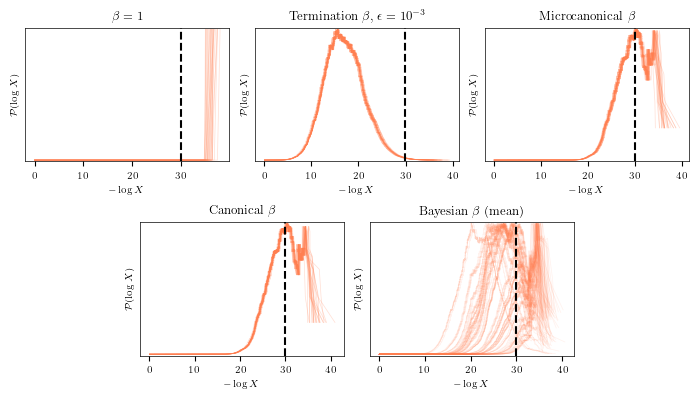

In [141]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(7, 4))
gs = gridspec.GridSpec(2, 6)
ax0 = fig.add_subplot(gs[0, :2])
ax1 = fig.add_subplot(gs[0, 2:4])
ax2 = fig.add_subplot(gs[0, 4:])
ax3 = fig.add_subplot(gs[1, 1:3])
ax4 = fig.add_subplot(gs[1, 3:5])
axs = [ax0, ax1, ax2, ax3, ax4]

for i, ax in enumerate(axs):
    if i == 4:
        for j in range(25):
            logbeta_post_samp = np.random.normal(*logbetas[i])
            logLX = np.exp(logbeta_post_samp) * points.logL + points.logX()
            ax.plot(-points.logX(5), np.exp(logLX - logLX.max()), lw=.5, color='coral', alpha=.1)
    else:
        logLX = np.exp(logbetas[i]) * points.logL + points.logX()
        ax.plot(-points.logX(25), np.exp(logLX - logLX.max()), lw=.5, color='coral', alpha=.25)
    ax.axvline(-points.logX().iloc[ndead], color='k', linestyle='--')
    ax.set_xlabel('$-\\log X$')
    ax.set_yticks([])
    ax.set_ylabel('$\\mathcal{P}(\\log X)$')
    ax.margins(y=0.01)
    ax.set_title(beta_titles[i])
fig.tight_layout()

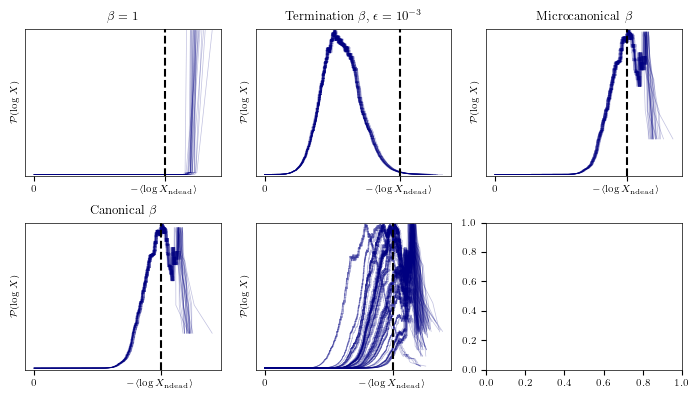

In [110]:
fig, axs = plt.subplots(2, 3, figsize=(7, 4))
for i, ax in enumerate(axs.flat[:-2]):
    if i == 4:
        logbeta_post_samp = np.random.normal(*logbeta_post)
        logLX = np.exp(logbeta_post) * points.logL + points.logX()
        ax.plot(-points.logX(5), np.exp(logLX - logLX.max()), lw=.5, color='navy', alpha=.25)
    ax.plot(-points.logX(25), np.exp(betas[i] * points.logL + points.logX()), lw=.5, color='navy', alpha=.25)
    ax.axvline(-points.logX().iloc[ndead], color='k', linestyle='--')
    ax.set_xticks([0, -points.logX().iloc[ndead]], [0, '$-\\langle \\log X_\\mathrm{ndead} \\rangle$'])
    ax.set_yticks([])
    ax.set_ylabel('$\\mathcal{P}(\\log X)$')
    ax.margins(y=0.01)
    ax.set_title(beta_titles[i])
    
ax = axs.flat[4]
for i in range(25):
    logbeta_post = np.random.normal(logbeta_post_mean, logbeta_post_std)
    logLX = np.exp(logbeta_post) * points.logL + points.logX()
    ax.plot(-points.logX(5), np.exp(logLX - logLX.max()), lw=.5, color='navy', alpha=.25)
ax.axvline(-points.logX().iloc[ndead], color='k', linestyle='--')
ax.set_xticks([0, -points.logX().iloc[ndead]], [0, '$-\\langle \\log X_\\mathrm{ndead} \\rangle$'])
ax.set_yticks([])
ax.set_ylabel('$\\mathcal{P}(\\log X)$')
ax.margins(y=0.01)

fig.tight_layout()